# Download CDC Diabetes Health Indicators dataset

In [62]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import json
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:

# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 

Dataset metadata

In [11]:
# metadata 
print(json.dumps(cdc_diabetes_health_indicators.metadata, indent=4))

{
    "uci_id": 891,
    "name": "CDC Diabetes Health Indicators",
    "repository_url": "https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators",
    "data_url": "https://archive.ics.uci.edu/static/public/891/data.csv",
    "abstract": "The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ",
    "area": "Life Science",
    "tasks": [
        "Classification"
    ],
    "characteristics": [
        "Tabular",
        "Multivariate"
    ],
    "num_instances": 253680,
    "num_features": 21,
    "feature_types": [
        "Categorical",
        "Integer"
    ],
    "demographics": [
        "Sex",
        "Age",
        "Education Level",
       

Features information 

In [30]:
features = cdc_diabetes_health_indicators.variables
features

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,Patient ID,None,no
1,Diabetes_binary,Target,Binary,None,0 = no diabetes 1 = prediabetes or diabetes,None,no
2,HighBP,Feature,Binary,None,0 = no high BP 1 = high BP,None,no
3,HighChol,Feature,Binary,None,0 = no high cholesterol 1 = high cholesterol,None,no
4,CholCheck,Feature,Binary,None,0 = no cholesterol check in 5 years 1 = yes ch...,None,no
5,BMI,Feature,Integer,None,Body Mass Index,None,no
6,Smoker,Feature,Binary,None,Have you smoked at least 100 cigarettes in you...,None,no
7,Stroke,Feature,Binary,None,(Ever told) you had a stroke. 0 = no 1 = yes,None,no
8,HeartDiseaseorAttack,Feature,Binary,None,coronary heart disease (CHD) or myocardial inf...,None,no
9,PhysActivity,Feature,Binary,None,physical activity in past 30 days - not includ...,None,no


# EDA

## Missing values

From the dataset description we know that there are no missing values

## Target variable analysis

### Diabetes rate

In [28]:
y.value_counts(normalize=True)

Diabetes_binary
0                  0.860667
1                  0.139333
Name: proportion, dtype: float64

We can see that the dataset is fairly unbalanced.

To fight it we'll use spliting stratified by target

In [53]:
# Create train-val-test split to analyse only features in the train-val part

X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [58]:
len(X_full_train), len(X_test), len(y_full_train), len(y_test)

(202944, 50736, 202944, 50736)

In [57]:
y_full_train.value_counts(normalize=True)

Diabetes_binary
0                  0.860666
1                  0.139334
Name: proportion, dtype: float64

##  Features analysis

### Features preview

In [50]:
X.head().T

,0,1,2,3,4
HighBP,1,0,1,1,1
HighChol,1,0,1,0,1
CholCheck,1,0,1,1,1
BMI,40,25,28,27,24
Smoker,1,1,0,0,0
Stroke,0,0,0,0,0
HeartDiseaseorAttack,0,0,0,0,0
PhysActivity,0,1,0,1,1
Fruits,0,0,1,1,1
Veggies,1,0,0,1,1


In [48]:
numeric_features = list(features[features.type == 'Integer'].name.values)
numeric_features.remove('ID')
numeric_features

['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

In [49]:
X[numeric_features].describe()

,BMI,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,28.382364,2.511392,3.184772,4.242081,8.032119,5.050434,6.053875
std,6.608694,1.068477,7.412847,8.717951,3.054220,0.985774,2.071148
min,12.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,24.000000,2.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,27.000000,2.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,31.000000,3.000000,2.000000,3.000000,10.000000,6.000000,8.000000
max,98.000000,5.000000,30.000000,30.000000,13.000000,6.000000,8.000000


array([[<Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoker'}>],
       [<Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>,
        <Axes: title={'center': 'Veggies'}>],
       [<Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>,
        <Axes: title={'center': 'MentHlth'}>],
       [<Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Income'}>, <Axes: >, <Axes: >, <Axes: >,


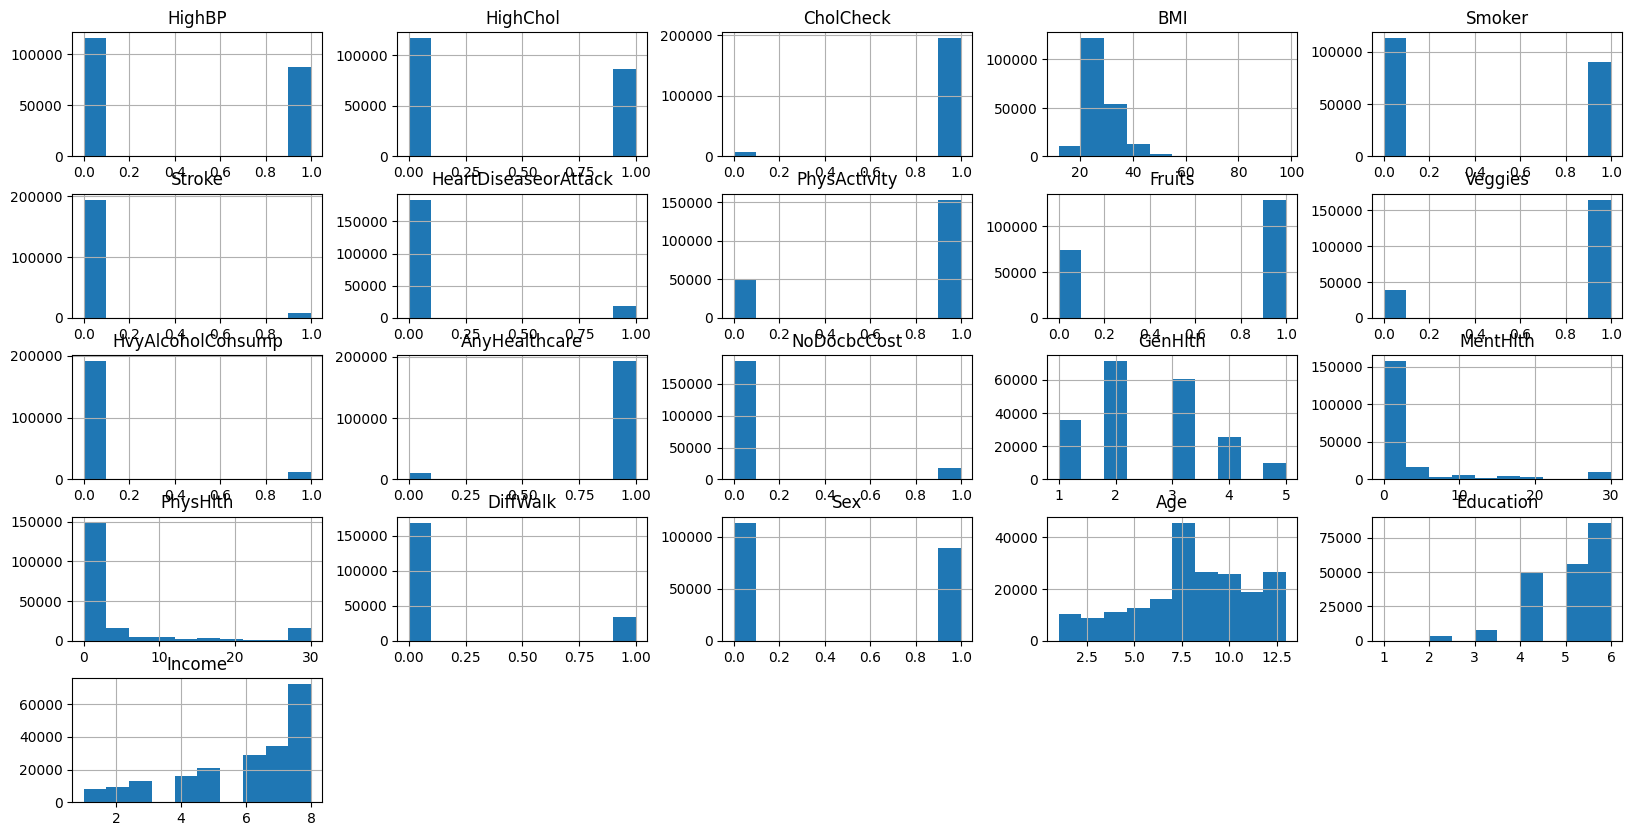

In [74]:
X_full_train.hist(
    figsize=(20, 10)
)


In [78]:
sorted(X_full_train.Income.unique())

[1, 2, 3, 4, 5, 6, 7, 8]